In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading Dataset
df=pd.read_csv("Battery_RUL.csv")
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [4]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [9]:
numlist=df.columns

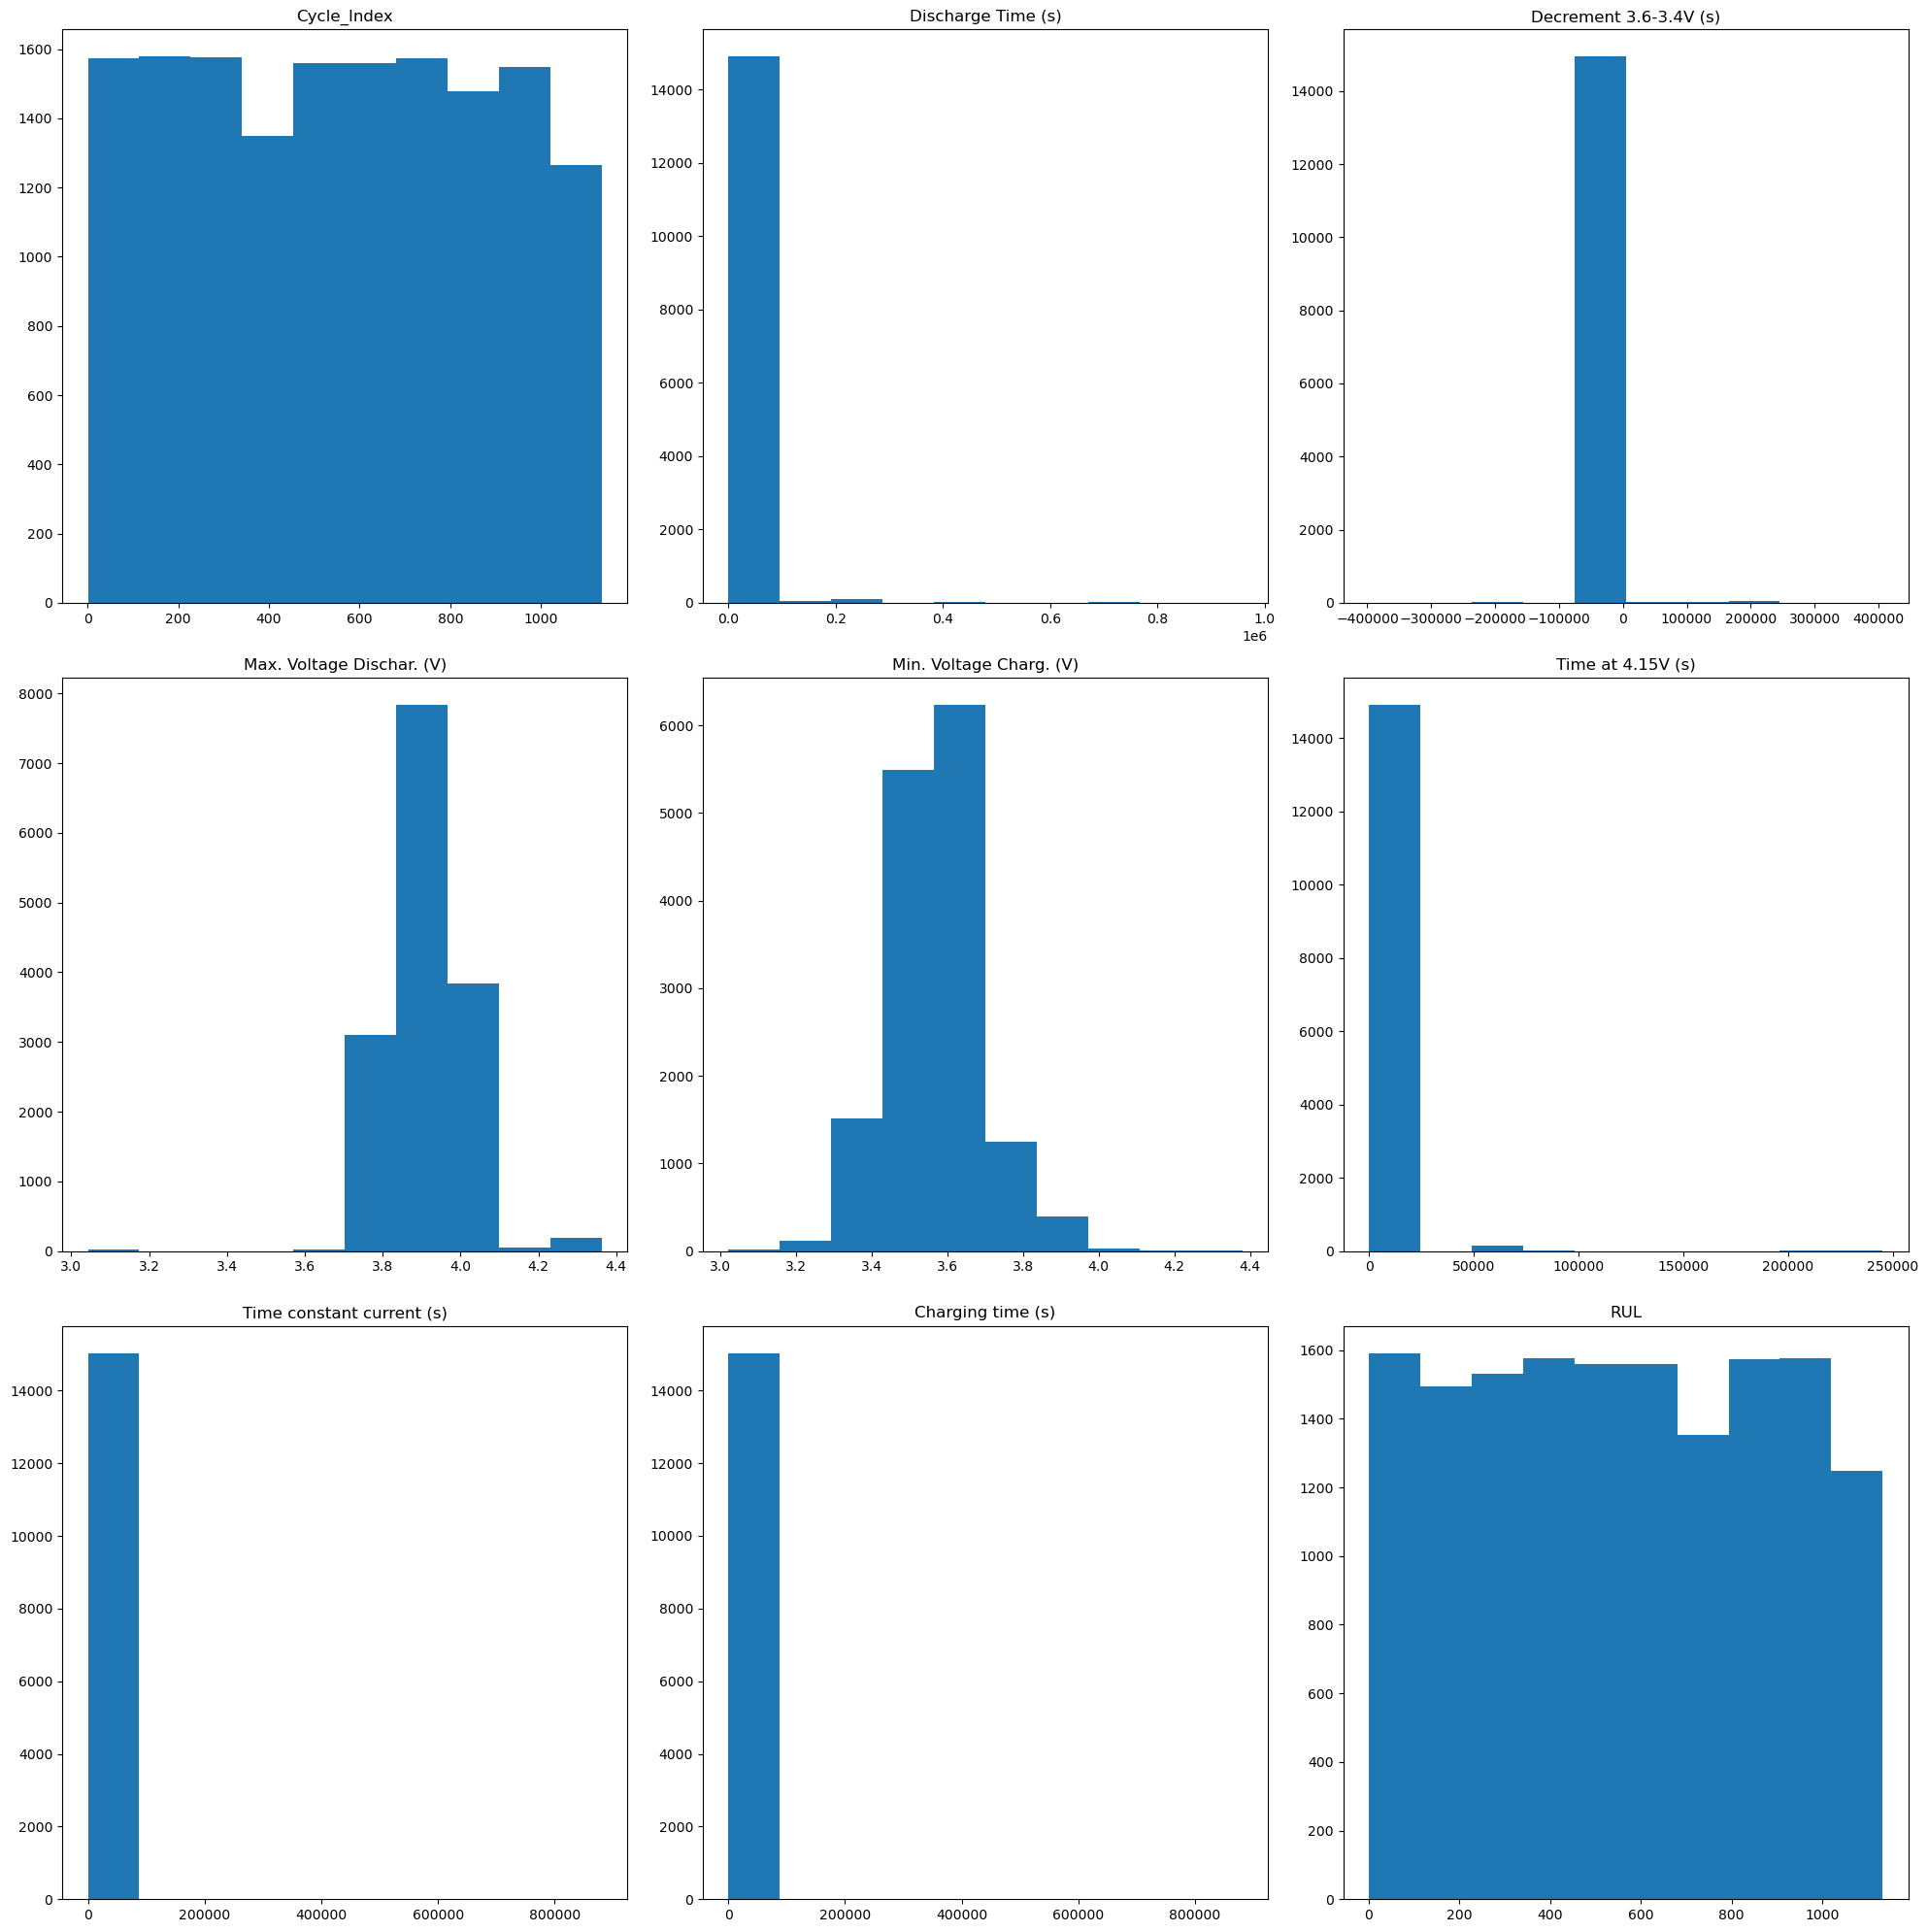

In [6]:
fig = plt.figure(figsize=(20,20))
for i in range(len(numlist)):
    ax = plt.subplot(3, 3, i + 1)  # Store the subplot axes in a variable
    ax.set_facecolor('white')  # Set the background color
    plt.title(numlist[i], fontsize=12)
    plt.hist(df[numlist[i]])

plt.tight_layout()
plt.show()



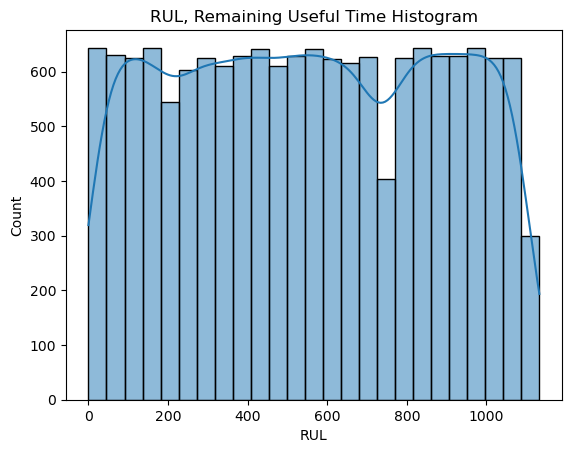

In [7]:
plt.title('RUL, Remaining Useful Time Histogram')
sns.histplot(df.RUL, kde=True)
plt.style.use('default')
plt.show()

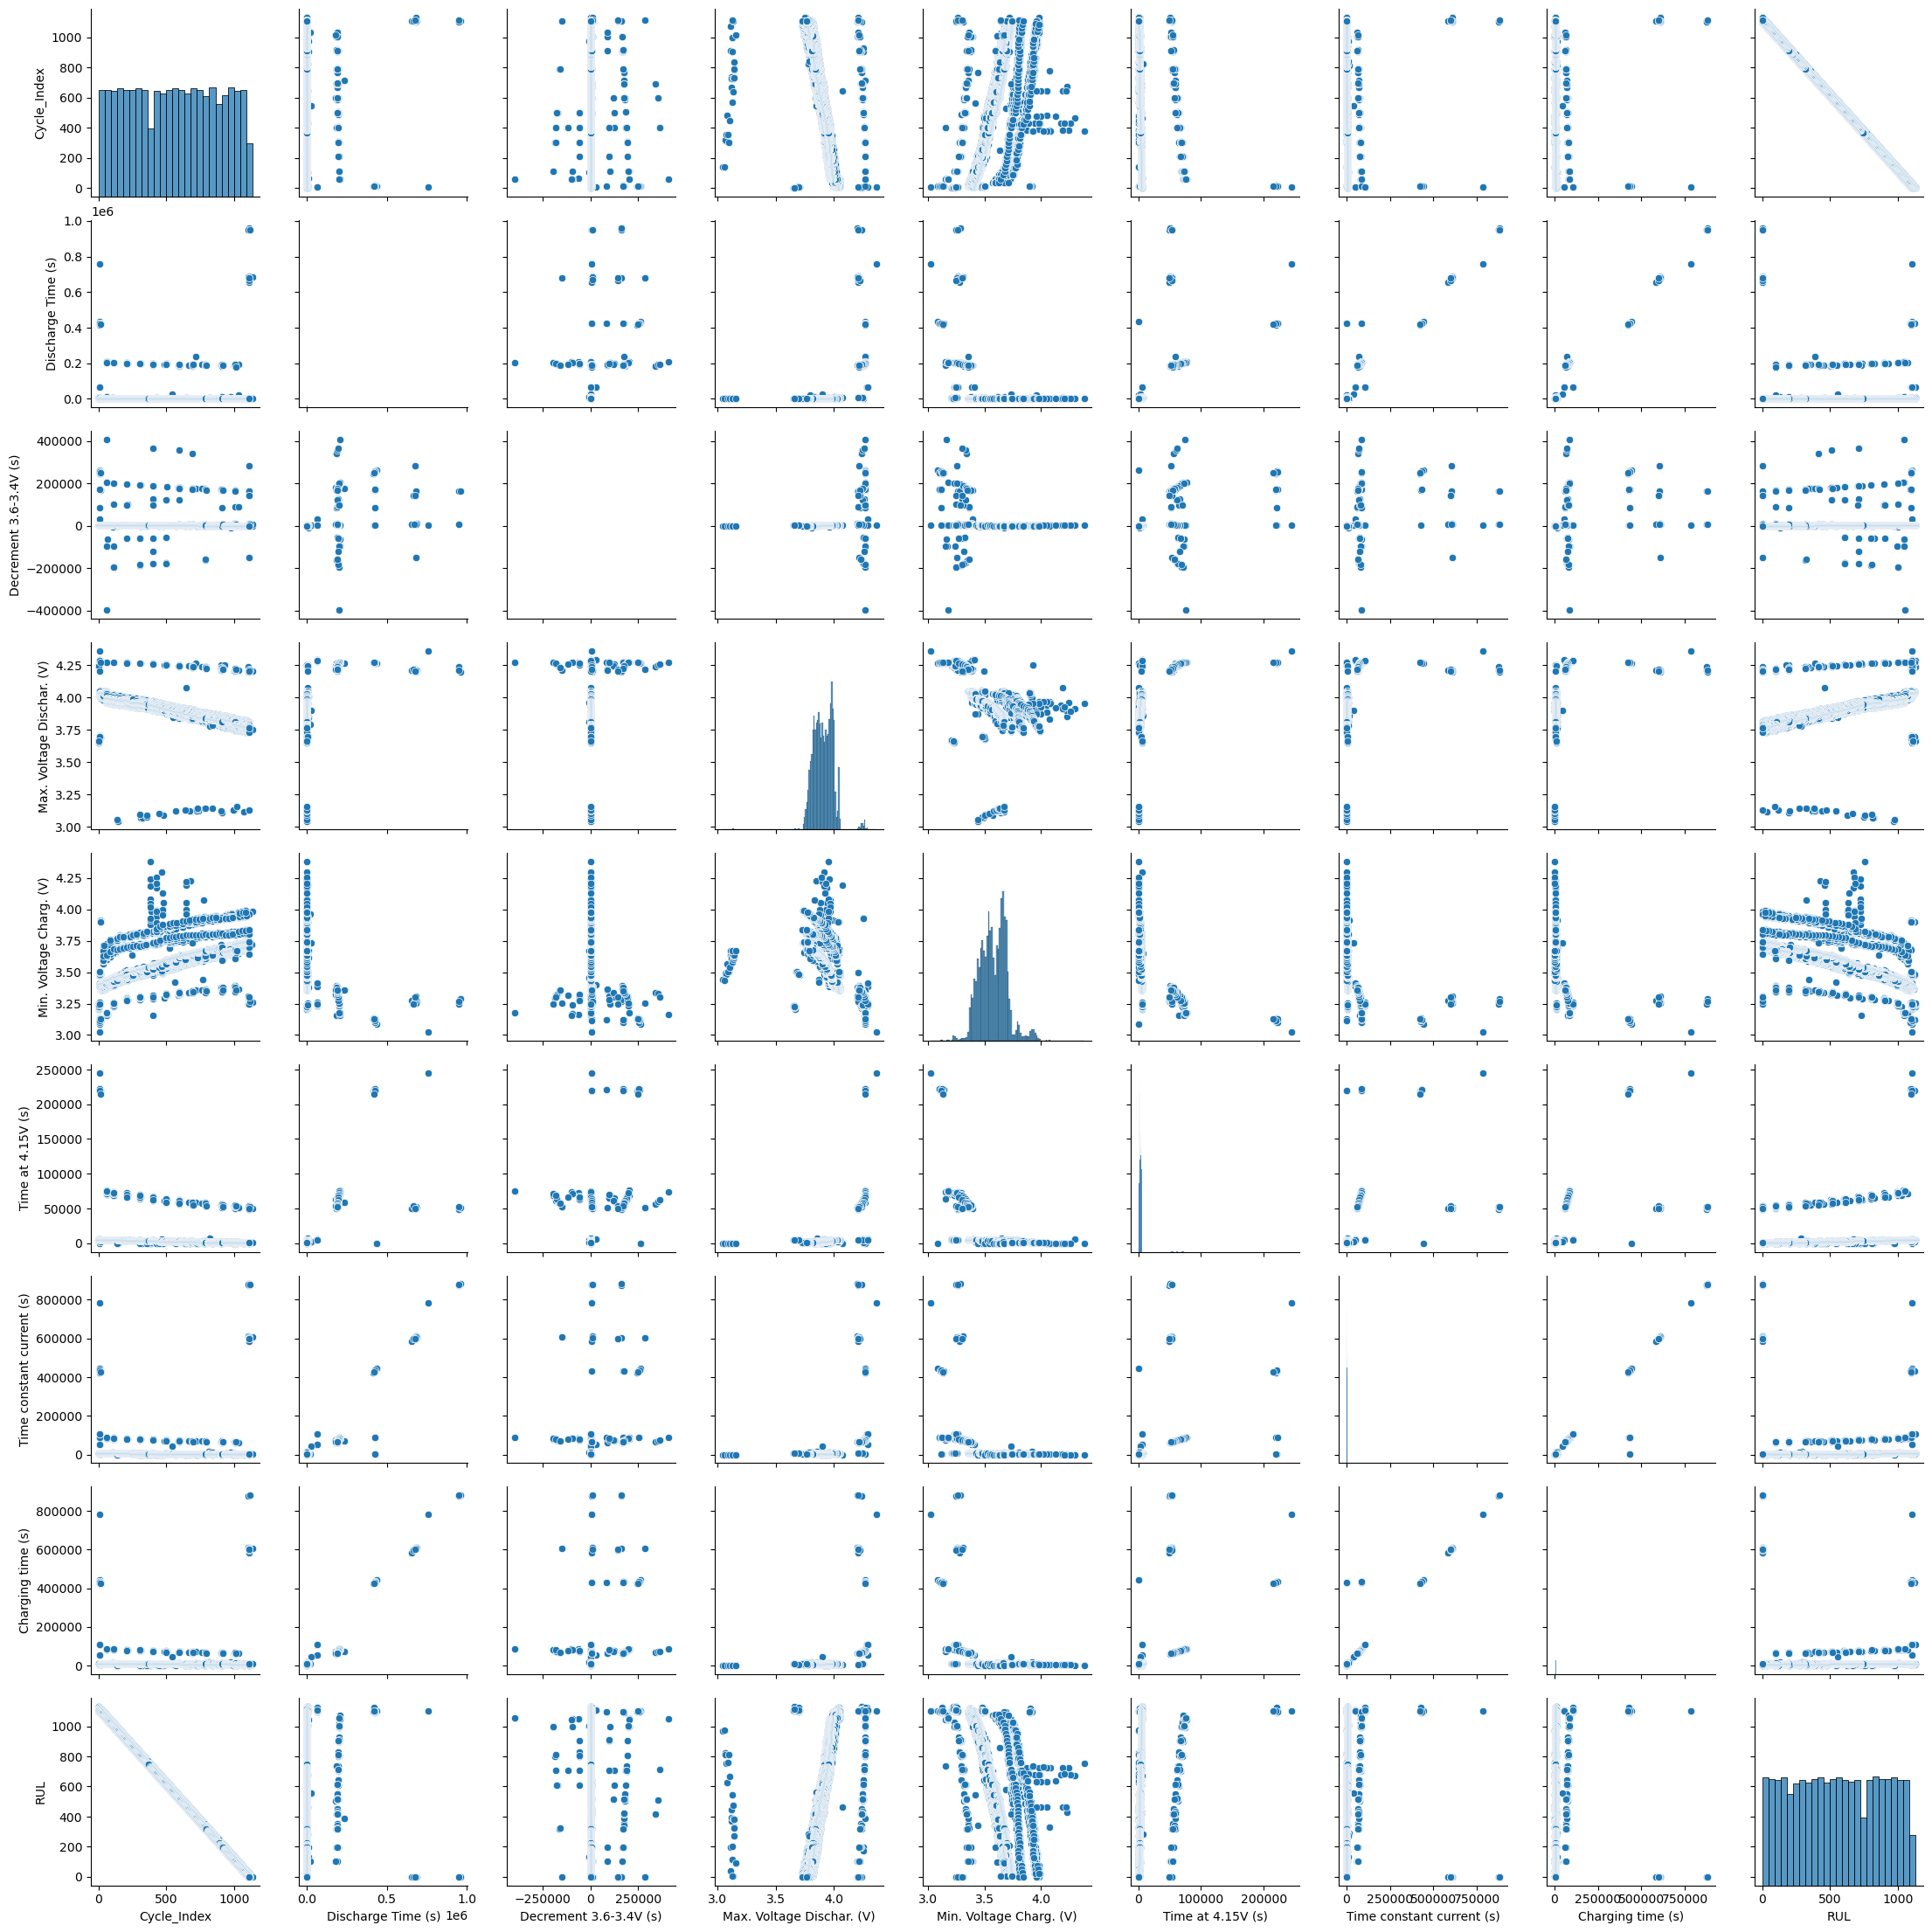

In [8]:
sns.pairplot(df)

<Axes: >

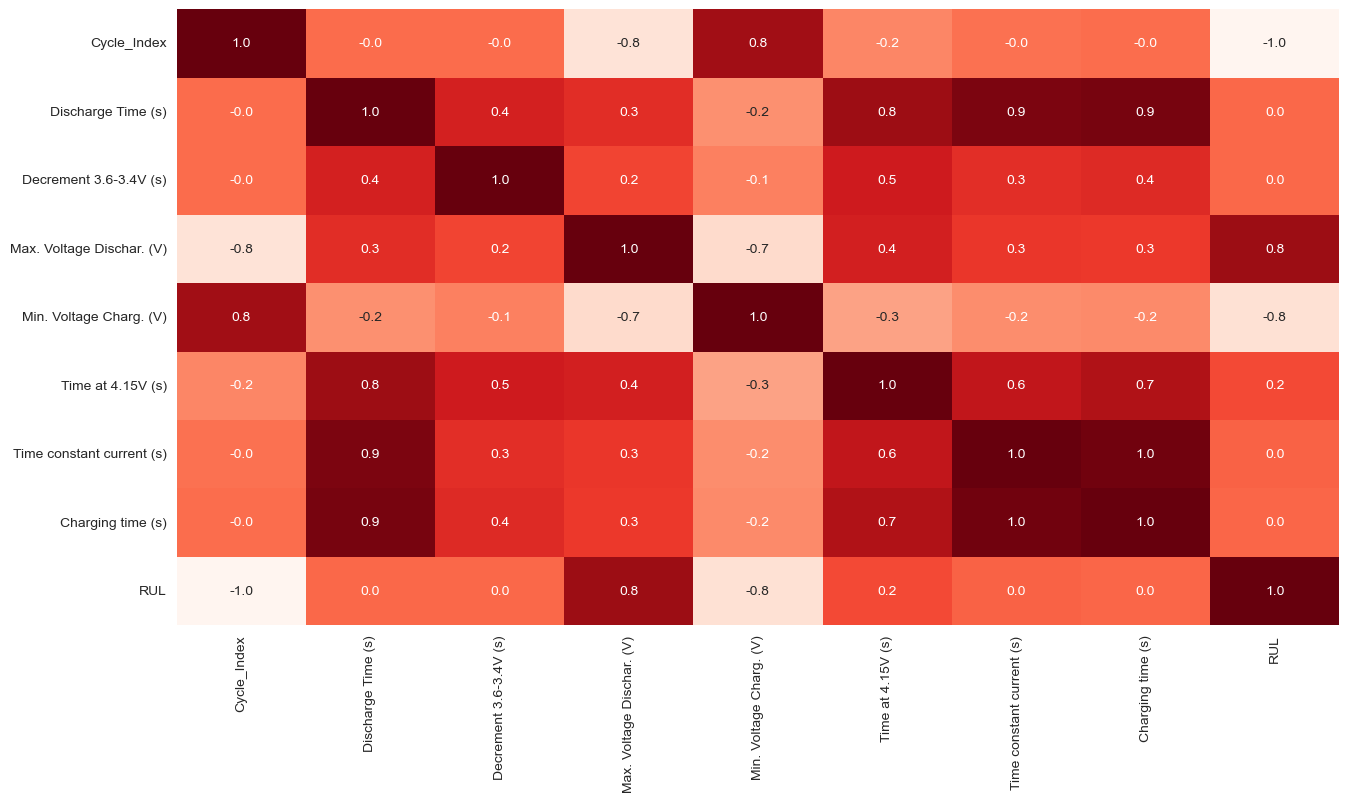

In [12]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, cbar=False, cmap='Reds', fmt='.1f')

In [16]:
target = df['RUL']
features = df.drop(['RUL'], axis=1)

target.shape, features.shape
# ((1032,), (1032, 14))

((15064,), (15064, 8))

In [17]:
# drop Cycle_Index
features = features.drop(['Cycle_Index'], axis=1)
features.shape

(15064, 7)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_std = scaler.fit_transform(features)

features_std = pd.DataFrame(features_std, columns = features.columns)
features_std

,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s)
0,-0.059922,-0.005871,-2.617313,-2.966302,0.185302,0.051431,0.026929
1,0.085308,-0.004473,3.712333,-2.893540,0.190668,0.051710,0.016425
2,0.084859,-0.008431,3.745300,-2.861201,0.190668,0.051710,0.013397
3,0.084610,-0.010603,3.756289,-2.853117,0.189904,0.051710,0.009704
4,1.823662,1.899962,4.195847,-1.454466,0.187601,1.898321,1.765439
...,...,...,...,...,...,...,...
15059,-0.114982,-0.070500,-1.485449,1.326665,-0.311697,-0.160957,-0.128248
15060,-0.114961,-0.070500,-1.485449,1.342834,-0.312493,-0.160960,-0.128570
15061,-0.115022,-0.070511,-1.485449,1.326665,-0.312493,-0.160960,-0.129829
15062,-0.114878,-0.071641,-1.595339,2.110879,-0.353694,-0.171468,-0.091082


In [19]:
from sklearn.model_selection import (train_test_split, StratifiedKFold)

X_train, X_test, y_train, y_test = train_test_split(features_std, target, test_size=0.2, random_state=2301)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12051, 7), (3013, 7), (12051,), (3013,))

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

pipeline = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])
pipeline

Pipeline(steps=[('impute', SimpleImputer())])

In [21]:
def prepare_model(algorithm, X_train, y_train): 
    model = Pipeline(steps=[('preprocessing', pipeline),('algorithm', algorithm)])
    model.fit(X_train, y_train)
    return model

In [22]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error

algorithms = [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor(), 
              BaggingRegressor(), SVR(), DecisionTreeRegressor(), ExtraTreeRegressor(), 
              LinearRegression(), SGDRegressor(), KNeighborsRegressor()]

In [23]:
names = []
times = []
mse = []
rmse = []

for algorithm in algorithms:
    name = type(algorithm).__name__
    names.append(name)
    start_time = time.time()
    model = prepare_model(algorithm, X_train, y_train)
    pred = model.predict(X_test)
    end_time = time.time()
    times.append(end_time - start_time)
    mse.append(mean_squared_error(y_test, pred))
    rmse.append(np.sqrt(mean_squared_error(y_test, pred)))

print('Regression Results in Algorithms') 
results_dict = {'Algorithm': names, 'MSE': mse, 'RMSE': rmse, 'Time': times}
pd.DataFrame(results_dict).sort_values(by='RMSE', ascending=1)

Regression Results in Algorithms


,Algorithm,MSE,RMSE,Time
0,RandomForestRegressor,533.390908,23.095257,15.799089
3,BaggingRegressor,672.003371,25.923028,1.512999
6,ExtraTreeRegressor,954.052273,30.887737,0.054056
9,KNeighborsRegressor,984.294086,31.373461,0.042999
5,DecisionTreeRegressor,1157.614172,34.023730,0.201996
2,GradientBoostingRegressor,1968.473689,44.367485,3.646574
1,AdaBoostRegressor,4492.560550,67.026566,0.816042
4,SVR,10637.882904,103.140113,9.798331
7,LinearRegression,22060.500669,148.527777,0.023049
8,SGDRegressor,22186.722314,148.952081,0.020001


In [24]:
rfr = RandomForestRegressor(random_state=2301, n_estimators=100)

rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

rfr_pred = rfr.predict(X_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_pred))
print(rfr_rmse)

0.9992551589548171
0.9946374885266009
23.26577679989827


<Axes: ylabel='RUL'>

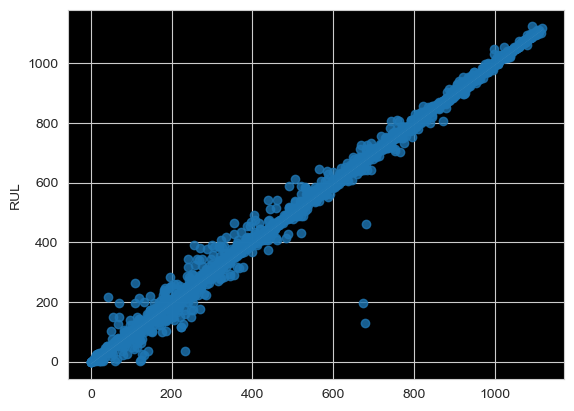

In [25]:
sns.regplot(x = rfr_pred, y = y_test)

In [26]:

# Create a BaggingRegressor model
bag_reg = BaggingRegressor(random_state=2301, n_estimators=100)

# Fit the model to the training data
bag_reg.fit(X_train, y_train)

# Print the scores on training and test data
print(bag_reg.score(X_train, y_train))  # Training score
print(bag_reg.score(X_test, y_test))    # Test score

# Predict on the test data
bag_reg_pred = bag_reg.predict(X_test)

# Calculate the Root Mean Squared Error
bag_reg_rmse = np.sqrt(mean_squared_error(y_test, bag_reg_pred))
print(bag_reg_rmse)


0.9992628277028843
0.9944337817918263
23.703558749876244


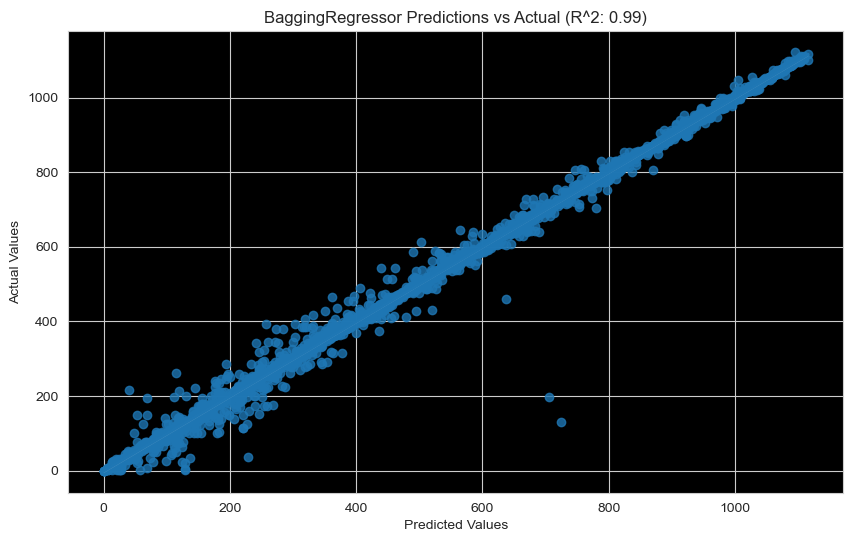

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the regression plot with Seaborn
sns.regplot(x=bag_reg_pred, y=y_test)

# Calculate R^2 score and add it as a title
r2 = r2_score(y_test, bag_reg_pred)
plt.title(f'BaggingRegressor Predictions vs Actual (R^2: {r2:.2f})')

# Setting labels
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# Show the plot
plt.show()